# Section 08

In [2]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
titanic = pd.read_csv("titanic.csv")
titanic['Embarked'].fillna("S", inplace=True)
med_age = int(titanic['Age'].mean())
titanic['Age'].fillna(med_age, inplace=True)
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['Embarked'] = titanic['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

###  1.1 Set up

In [10]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Age','Fare','Survived']
titanic = titanic[['Pclass', 'Sex','Embarked','SibSp', 'Parch','Age','Fare','Survived']]
from sklearn.model_selection import train_test_split

# Test/train split.
X_titan = titanic.drop('Survived', axis = 1)
y_titan = titanic[['Survived']]
X_titan_train, X_titan_test, y_titan_train, y_titan_test =\
train_test_split(X_titan, y_titan, test_size=1/4, random_state=42)

### 1.2  Model Fit

In [12]:
# Fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=55,max_depth=2)
z = clf.fit(X_titan_train,y_titan_train).predict(X_titan_test)

##compute the test accuracy
acc_random_forest_test = accuracy_score(z,y_titan_test)
print("The test accuracy is %.6f" % acc_random_forest_test)

The test accuracy is 0.766816


### 1.3 Model Improvement

Best prediction accuracy:  0.8161434977578476
n_estimators :  71


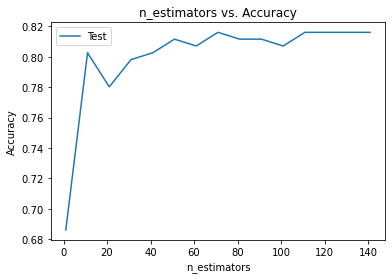

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf_arru_lst_test = []
n_estimators_lst = np.arange(1,150,10)

for k in n_estimators_lst:
    # Fit random forest.
    rf = RandomForestClassifier(max_depth=3, n_estimators=k, random_state=42)
    rf.fit(X_titan_train, y_titan_train.values)
    # Get accuracies.
    rf_y_titan_pred_test = rf.predict(X_titan_test)
    acc_random_forest_test = accuracy_score(rf_y_titan_pred_test,y_titan_test)
    rf_arru_lst_test.append(acc_random_forest_test)
    
print("Best prediction accuracy: ", max(rf_arru_lst_test))
print("n_estimators : ", n_estimators_lst[rf_arru_lst_test.index(max(rf_arru_lst_test))])

plt.plot(n_estimators_lst, rf_arru_lst_test, label = "Test")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

### 2.1 Model Fit

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_titan_train,y_titan_train).predict(X_titan_test)

##compute the test accuracy
acc_logistic_test = accuracy_score(logreg,y_titan_test)
print("The test accuracy is %.6f" % acc_logistic_test)

The test accuracy is 0.798206


### 2.2  GridSearchCV on Logistic Regression

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Create the default model.
logreg2 = LogisticRegression()

# Grid of parameters over which to optimize.
grid = {'C': np.arange(1e-5, 5.5, 0.1)}

# Search the grid.
gridsearch = GridSearchCV(estimator=logreg2, param_grid=grid, cv=5)
grid_result = gridsearch.fit(X_titan_train, y_titan_train)

# Print.
print("Best parameters: ", grid_result.best_params_)
print("Score: ", grid_result.best_score_)

Best parameters:  {'C': 0.10001}
Score:  0.7992930086410055
